# Air Quality Solutions
### Python Workshop \#1 - Air Quality Measurement Data

#### Content
* Reading in csv data using pandas
* Indexing pandas dataframes
* Datetime indexing
* Creating simple plots using pandas and matplotlib
* Resampling, rolling and groupby operations
* Cross-referencing with metadata

### Reading in data

The first task is to read the csv file containing into a `pandas.DataFrame`. This is a class in python that has been specifically made to contain time series data, so it is convenient to use it for data analysis and plotting.

The data we will use is from the China National Environmental Monitoring Center (CNEMC) network. It is stored in a `.csv` file which is a simple text-based format which can be viewed and edited in Excel, and can also be conveniently read into a `DataFrame`.

The data is kept in a folder (or directory) called 'data' and then in another folder for the current workshop, as shown in the directory tree below:

To read it in, we can use a 'relative filepath,' where the `.` sybolises the location of the current workbook.

In [1]:
# first we need to import the required packages
import pandas as pd
import matplotlib.pyplot as plt

# relative filepath
fpath = './data/workshop_1/station_1150A_data.csv'

# read in the data
df = pd.read_csv(fpath)
# by convention, pandas dataframes are stored in a variable called df

print(df)

                Unnamed: 0  PM2.5    O3   NO2   SO2   CO
0      2014-05-13 00:00:00   64.3  84.3  55.9  14.7  0.7
1      2014-05-13 01:00:00   71.9  90.7  47.6  15.6  0.7
2      2014-05-13 02:00:00   69.9  85.2  38.5  19.2  0.7
3      2014-05-13 03:00:00   76.5  68.7  42.1  27.5  0.8
4      2014-05-13 04:00:00   73.9  71.5  36.6  27.5  0.7
...                    ...    ...   ...   ...   ...  ...
89659  2024-08-03 19:00:00   25.0  88.0  24.0   5.0  0.6
89660  2024-08-03 20:00:00   26.0  94.0  24.0   5.0  0.7
89661  2024-08-03 21:00:00   31.0  96.0  20.0   5.0  0.7
89662  2024-08-03 22:00:00   32.0  76.0  22.0   5.0  0.7
89663  2024-08-03 23:00:00   30.0  83.0  15.0   5.0  0.6

[89664 rows x 6 columns]


Printing `df` shows us the structure of a pandas dataframe:
* 2D structure made from rows and columns
* The axes are labelled, i.e. each column and row has a name/index
* The row indices, seen on the far right, are currently just integers from 0 to 89663.
* The column names are (mostly!) the names of five different pollutants.

Let's test some of the functionality of a pandas dataframe, namely indexing by row, by column and both.

One of the ways of indexing dataframes is by using the `.loc` method, e.g. 
```python
df.loc[row index, column index]
```


In [2]:
# e.g., to extract the first row
df.loc[0]
# Note: python starts counting at 0, so the first row is the 0th index!

Unnamed: 0    2014-05-13 00:00:00
PM2.5                        64.3
O3                           84.3
NO2                          55.9
SO2                          14.7
CO                            0.7
Name: 0, dtype: object

In [3]:
# to extract the column named 'SO2'
df.loc[:, 'SO2'] # '' are needed because this dataframe uses strings as column names
# Note: ':' means 'all', which is why we get all the rows in the SO2 column

0        14.7
1        15.6
2        19.2
3        27.5
4        27.5
         ... 
89659     5.0
89660     5.0
89661     5.0
89662     5.0
89663     5.0
Name: SO2, Length: 89664, dtype: float64

In [4]:
# or to combine them, and extract the 100th value of the O3 column:
df.loc[99, 'O3']

np.float64(136.5)

You can also use `.iloc` to index the dataframe using integers, regardless of the content of the row and column indexes.

Both of the above give the same value since NO2 is the third column:

In [5]:
df.loc[923, 'NO2'] == df.iloc[923, 3]

np.True_

You can also select a range of values. For example, the first 10 values of the 'PM2.5' columns can be extracted like this

In [6]:
df.loc[0:9, 'PM2.5']

0    64.3
1    71.9
2    69.9
3    76.5
4    73.9
5    66.5
6    69.7
7    72.3
8    67.5
9    52.7
Name: PM2.5, dtype: float64

#### <font color='red'>Question 1</font>

Python also allows 'negative indexing,' i.e. using a negative integer to index from the end of the array. For example, the index `-1` refers to the last value in an array. Use this to answer the following question. 

What is the maximum NO2 value recorded during the most recent 24 hour period in `df`?

In [7]:
# print the minimum NO2 in the most recent 24 hours in this cell


#### <font color='green'>Answer 1</font>

```python
print(df.iloc[-24:].loc[:, 'NO2'].max())
# prints 39.0
```


Here, you need to use `iloc` to index the rows, then `.loc` to index the columns

### Quick plots
Pandas dataframes have a lot of built-in methods that allow quick and easy plotting. See [this page](https://pandas.pydata.org/docs/user_guide/visualization.html) for a list of them. They can be called to get a quick look at the data and get a basic idea of its properties, e.g.

<Axes: >

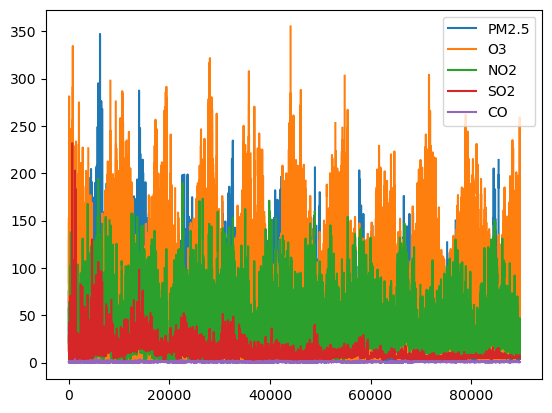

In [8]:
df.plot()

### Indexing by datetime

Say we want to calculate the average PM<sub>2.5</sub> concentration on Christmas day 2017, how can we find which row corresponds to '2017-12-25'? To do this is the simplest way, we first need to fix issues with the dataframe's format

Currently, the dataframe's rows are indexed by integers ranging from 0 to 89633, and the dates and times are stored in the first column, which is called 'Unnamed: 0'. Also, as can be seen by printing the datatypes using `df.dtypes`, pandas currently stores the dates and times as strings, rather than understanding them to be actual datetimes. To fix these issues we need to:
1. rename 'Unnamed: 0' column to 'datetime'
2. convert the date time strings into datetime objects that pandas can understand
3. replace the integer index with the new datetime index

In [9]:
# 1.
df = df.rename({'Unnamed: 0':'datetime'}, axis=1)
# note: we use a dictionary to 'map' the old -> new column name
# note: we overwrite the 'df' variable to replace it with the renamed df by using '='

# 2.
df['datetime'] = pd.to_datetime(df['datetime'], # pass the datetime column into the pandas 'to_datetime' function
                                format='%Y-%m-%d %H:%M:%S') # tell it the format of the datetime string
# note: it is often unnecessary to pass the format string as pandas can recognise standard formats

# 3.
df = df.set_index('datetime')

# print df to see what we have now
print(df)

                     PM2.5    O3   NO2   SO2   CO
datetime                                         
2014-05-13 00:00:00   64.3  84.3  55.9  14.7  0.7
2014-05-13 01:00:00   71.9  90.7  47.6  15.6  0.7
2014-05-13 02:00:00   69.9  85.2  38.5  19.2  0.7
2014-05-13 03:00:00   76.5  68.7  42.1  27.5  0.8
2014-05-13 04:00:00   73.9  71.5  36.6  27.5  0.7
...                    ...   ...   ...   ...  ...
2024-08-03 19:00:00   25.0  88.0  24.0   5.0  0.6
2024-08-03 20:00:00   26.0  94.0  24.0   5.0  0.7
2024-08-03 21:00:00   31.0  96.0  20.0   5.0  0.7
2024-08-03 22:00:00   32.0  76.0  22.0   5.0  0.7
2024-08-03 23:00:00   30.0  83.0  15.0   5.0  0.6

[89664 rows x 5 columns]


In [10]:
# now we can get the mean PM2.5 on Christmas day 2017
mean_pm = df.loc['2017-12-25', 'PM2.5'].mean()
print(f'The mean PM2.5 on Christmas day 2017 is {mean_pm:.2f} µg m⁻³')

The mean PM2.5 on Christmas day 2017 is 47.25 µg m⁻³


The three steps above help to illustrate how to fix common issues with initial formatting of dataframes and understand their structure. However, they could've been avoided by supplying extra arguments to `pd.read_csv()` when originally reading the dataframe.

You can find the documentation for a function of method online. For example, `pd.read_csv` is [available here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). 

#### <font color='red'>Question 2</font>
Using the documentation link, work out how add *two* extra arguments when reading in `df` using `pd.read_csv()` in order to correctly format the dataframe.


In [11]:
# write code to read in the csv file into a variable called df here:

#### <font color='green'>Answer 2</font>

```python
df = pd.read_csv(fpath, 
                 index_col=0, # use the first column as the index
                 parse_dates=True # automatically detect and convert dates
                )
```

We can also use a date range to index the dataframe.

For example, to select NO2 data during May 2023:

In [12]:
df.loc['2023-05-01':'2023-05-31', 'NO2']

datetime
2023-05-01 00:00:00    38.0
2023-05-01 01:00:00    40.0
2023-05-01 02:00:00    43.0
2023-05-01 03:00:00    40.0
2023-05-01 04:00:00    36.0
                       ... 
2023-05-31 19:00:00    34.0
2023-05-31 20:00:00    35.0
2023-05-31 21:00:00    34.0
2023-05-31 22:00:00    26.0
2023-05-31 23:00:00    20.0
Name: NO2, Length: 744, dtype: float64

#### <font color='red'>Question 3</font>

PM2.5 concentration has substatially decreased over China since the CNEMC monitoring network was established in 2014. Using the data in `df`, calculate the decrease in the average PM2.5 concentration between 2015 (the first full year of data) and 2023 (the last full year) to one decimal place

In [13]:
# Calculate the PM2.5 decrease in this cell

#### <font color='green'>Answer 3</font>

21.2 µg m⁻³

```python
mean_2015 = df.loc['2015-01-01':'2015-12-31', 'PM2.5'].mean()
mean_2023 = df.loc['2023-01-01':'2023-12-31', 'PM2.5'].mean()
diff = mean_2023 - mean_2015

print(f'The mean PM concentration in 2015 was {mean_2015:.1f} µg m⁻³.',
     f'In 2023 it was {mean_2023:.1f} µg m⁻³, meaning it decreased by {abs(diff):.1f} µg m⁻³')
```

### Advanced datetime indexing

Now that the dataframe has a `DatetimeIndex` (you can verify this using `type(df.index)`), we can take advantage of pandas' inbuilt methods to filter the data efficiently using dates

The DatetimeIndex has useful methods such as `.month`, `.dayofweek`, `.year` and `.hour`. These can be used to create 'boolean masks,' which simply means an array of `True`/`False` values, that can then be used to index the DataFrame.

For example, to compare the the NO2 concentration on weekdays and weekends, we create the 'boolean masks' `weekdays_mask` and `weekends_mask`, then use these to index `df`:

In [14]:
# 1. create a boolean mask for weekdays
weekdays_mask = df.index.dayofweek.isin((0,1,2,3,4))
weekends_mask = df.index.dayofweek.isin((5,6))
# note: 'isin' returns true if the day of week is any of the supplied numbers
# note: zero-based indexing must be taken into account again, so Monday=0, Tuesday=1 etc.

# 2. use the masks to index the rows of the dataframe, and calculate the mean
weekdays_mean = df.loc[weekdays_mask, 'NO2'].mean()
weekends_mean = df.loc[weekends_mask, 'NO2'].mean()

print(f'The NO2 concentration on weekdays is on average {weekdays_mean:.2f}')
print(f'The NO2 concentration on weekends is on average {weekends_mean:.2f}')

The NO2 concentration on weekdays is on average 35.47
The NO2 concentration on weekends is on average 33.56


Multiple boolean masks can also be combined to produce combinations of different conditions, i.e.
```python
combined_mask = mask_a & mask_b
```

#### <font color='red'>Question 4</font>
The highest ozone concentrations usually occur during summer afternoons. Calculate the average summer (June, July and August) Ozone concentration at 3pm using the data in `df`. Use the combined boolean mask technique shown above.

In [15]:
# Calculate the mean summer afternoon ozone here.

#### <font color='green'>Answer 4</font>

```python
afternoon_mask = df.index.hour == 16 # i.e. 4pm
summer_mask = df.index.month.isin((6,7,8)) # i.e. June, July, August
summer_afternoon_mask = afternoon_mask & summer_mask # note the use of the '&' operator
summer_afternoon_mean = df.loc[summer_afternoon_mask, 'O3'].mean()
print(f'The summer 4pm average ozone concentration is {summer_afternoon_mean:.2f} µg m⁻³')
```

Answer: 116.40

### Basic ploting
With pandas, it is relatively simple to create simple plots using matplotlib. The default plot type for a pandas dataframe is a time series. For example:

<Axes: title={'center': '2023 Ozone time series'}, xlabel='date', ylabel='concentration [µg m⁻³]'>

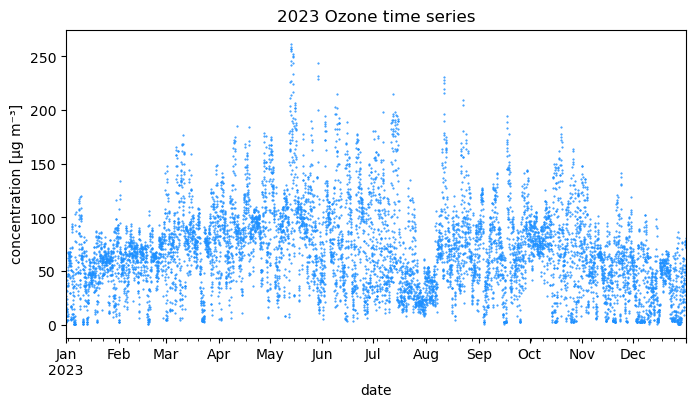

In [16]:
df.loc['2023-01-01':'2023-12-31', 'O3'].plot(
    title='2023 Ozone time series',
    marker='.', # plot each observation as a point
    ls='', # do not draw lines between points
    color='dodgerblue', # color of the points
    markersize=1, # control the size of the points
    xlabel='date', # add an x label
    ylabel='concentration [µg m⁻³]', # add a y label
    figsize=[8,4] # control the dimensions of the plot
)

Other types of plots can be created in a similar way. Pandas can produce many types of visualisation. See below for a variety of plots simply made using pandas

<Axes: title={'center': 'Number of NaNs'}>

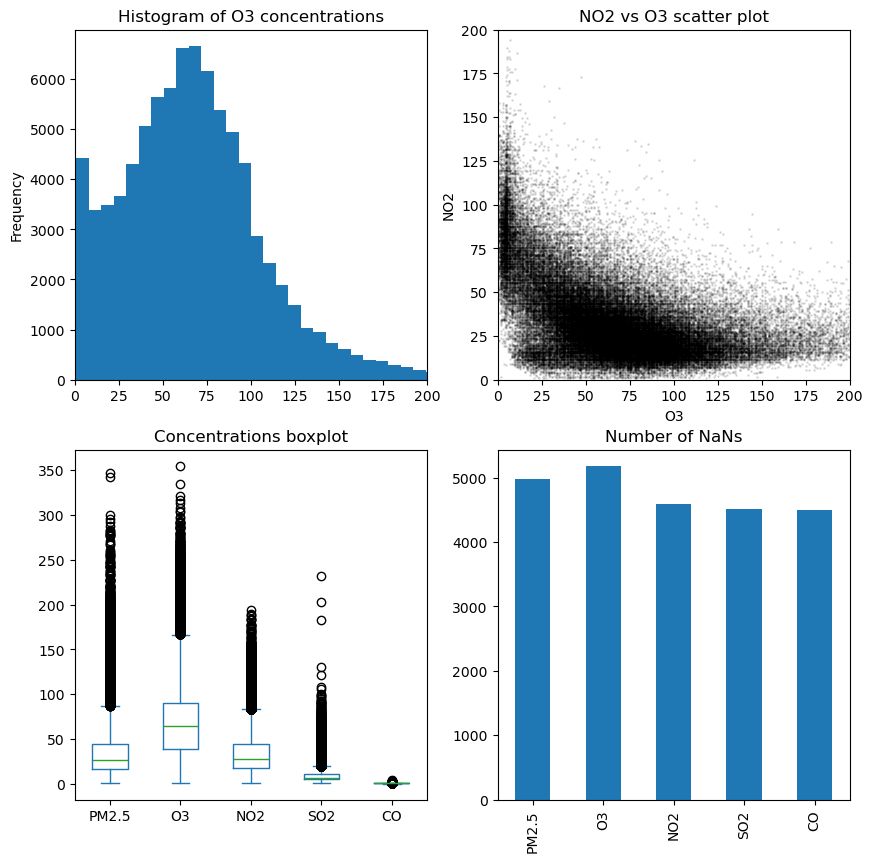

In [17]:
fig, axes = plt.subplots(2,2, figsize=[10,10]) # setup a 2x2 grid of axes

df['O3'].plot.hist(
    ax=axes[0,0],
    bins=50,
    title='Histogram of O3 concentrations',
    xlim=(0,200)
)

df.plot.scatter(
    x='O3', y='NO2',
    title='NO2 vs O3 scatter plot',
    ax=axes[0,1],
    color='black',
    alpha=.1, s=1,
    xlim=(0,200), ylim=(0,200)
)

df.plot.box(
    ax=axes[1,0],
    title='Concentrations boxplot'
)

df.isna().sum().plot.bar(
    ax=axes[1,1],
    title='Number of NaNs'
)

In the above example, we use `plt.subplots` to create a 2x2 grid. `plt.subplots` returns a figure (which we store in the variable `fig`) and a set of axes (which we store in the variable `axes`). The `Figure` can be thought of as the paper on which you draw your plots. Each figure can host multiple axes, and the size of the figure can be set using the `figsize` keyword (in inches). Since we created a 2x2 grid with 4 axes, the `axes` object contains four `axes` which are typically represented in an object called `ax`. The above example shows how each individual `ax` can be retrieved by indexing `axes`.

---
### Resampling, rolling and groupby

#### Resampling
Since pandas has been developed around handling time series data, it is easy to resample data to different frequencies. When resampling data, you must provide the desired resulting frequency (e.g. daily, monthly, annual) and the operation to perform (e.g. mean, count, maximum) E.g. to average data to monthly frequency, pass `.resample()` the frequency string `'MS'` (month start), then use the `.mean()` method:

<Axes: xlabel='datetime'>

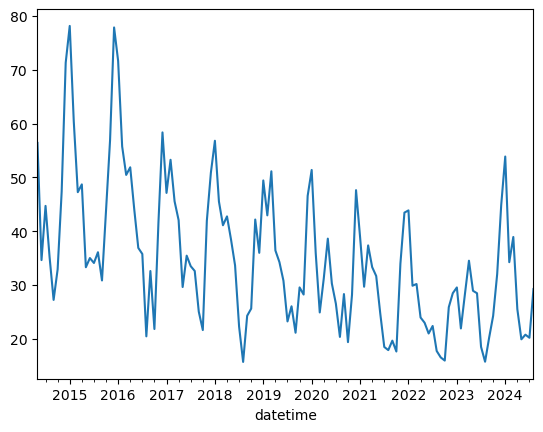

In [18]:
df['PM2.5'].resample('MS').mean().plot()

#### Rolling
'Rolling' or sliding window/boxcar operations are similar to 'resampling', but at a higher frequency. We can illustrate this by comparing `.resample('D')` (blue) with `.rolling('D')` (orange) in the plot below.

<Axes: xlabel='datetime'>

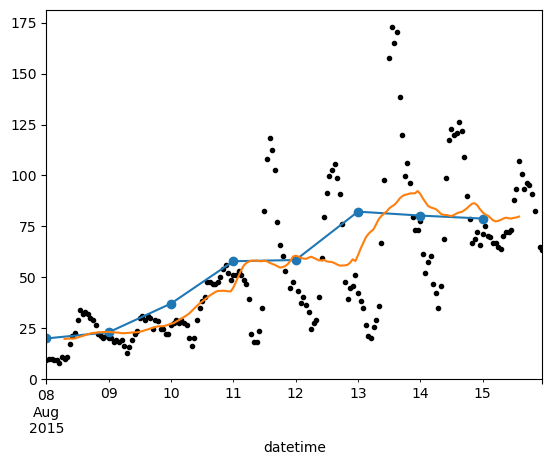

In [19]:

sr = df.loc['2015-08-08':'2015-08-15', 'O3'] #  get a weeklong series of PM2.5 data
sr.plot(marker='.', ls='', color='black')
sr.resample('D').mean().plot(marker='o')
sr.rolling('D', center=True, min_periods=20).mean().plot()

In [20]:
daily_resampled = sr.resample('D').mean()
daily_resampled.index = daily_resampled.index + pd.Timedelta(hours=12)
print(daily_resampled.index)
print(sr.index)

DatetimeIndex(['2015-08-08 12:00:00', '2015-08-09 12:00:00',
               '2015-08-10 12:00:00', '2015-08-11 12:00:00',
               '2015-08-12 12:00:00', '2015-08-13 12:00:00',
               '2015-08-14 12:00:00', '2015-08-15 12:00:00'],
              dtype='datetime64[ns]', name='datetime', freq='D')
DatetimeIndex(['2015-08-08 00:00:00', '2015-08-08 01:00:00',
               '2015-08-08 02:00:00', '2015-08-08 03:00:00',
               '2015-08-08 04:00:00', '2015-08-08 05:00:00',
               '2015-08-08 06:00:00', '2015-08-08 07:00:00',
               '2015-08-08 08:00:00', '2015-08-08 09:00:00',
               ...
               '2015-08-15 14:00:00', '2015-08-15 15:00:00',
               '2015-08-15 16:00:00', '2015-08-15 17:00:00',
               '2015-08-15 18:00:00', '2015-08-15 19:00:00',
               '2015-08-15 20:00:00', '2015-08-15 21:00:00',
               '2015-08-15 22:00:00', '2015-08-15 23:00:00'],
              dtype='datetime64[ns]', name='datetime', lengt

#### <font color='red'>Question 5</font>

After PM2.5, ozone is the pollutant with the next largest impact on human health, as well having an impact on plants which causes losses of crops. 

A commonly used metric for Ozone health impacts is 'O3MDA8,' which is the maximum daily, 8-hour average. To calculate this metric, first calculate the rolling 8-hour mean (using `.rolling()`, then daily maximum value (using `.resample()`). <font color='red'>The data contains periods of missing data, make sure each 8-hour average does not contain fewer than 6 values</font>. Use the `min_periods` argument of `.rolling()` for this.

A commonly used metric for ozone impacts on plants is the 'AOT40,' which is the ozone accumulated over a threshold of 40 parts per billion (ppb), during the growing season and daylight hours. We can assume that 1ppb ≈ 2 µg m⁻³. To calculate this metric, sum the hourly values of Ozone >80 µg m⁻³. Assume the growing season is May-August and that daylight hours are 8am to 8pm.

__Calculate annual mean O3MDA8 and annual total AOT40 (2015-2023), and plot them both on a time series__

Tips:
* Since 2014 and 2024 are not complete, do not include them in the plot
* Splitting your code into functions can be an efficient way to write clearer python code. This is because the variables created within a function will never 'leak' into the global namespace, you don't need to worry about creating new variables that overwrite old ones. If you want to pratice this, try writing a function for calculating O3MDA8 and AOT40
* Since the range of values for O3MDA8 (usually < 200) and AOT40 (>10000) are two orders of magnitude apart, the best way to plot them on a graph is by using a secondary y axis. 

Text(0, 0.5, 'AOT40 [µg m⁻³]')

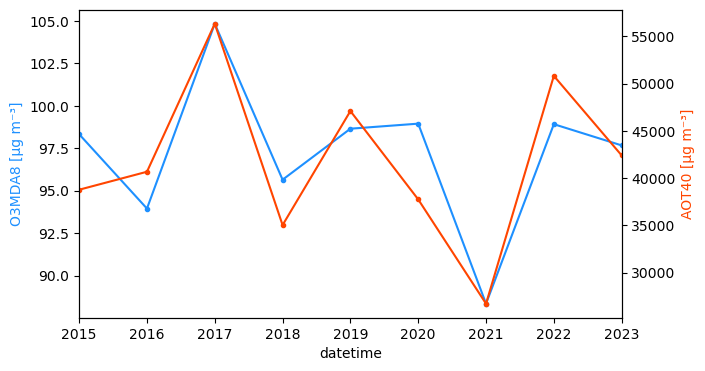

In [21]:


def calculate_annual_mean_o3mda8(sr):
    mean8hr = sr.rolling('8h', min_periods=6).mean() # get 8hr rolling mean
    o3mda8 = mean8hr.resample('D').max() # find max in each day
    annual_mean = o3mda8.resample('YS').mean() # take annual mean
    return annual_mean

def calculate_annual_aot40(sr):
    threshold = sr > 80 # only when o3 > 80
    daylight = sr.index.hour.isin(range(8,21))
    growing_season = sr.index.month.isin((5,6,7,8))
    conditions = threshold & daylight & growing_season # combine conditions
    
    aot40 = (sr - 80).loc[conditions]
    annual_aot40 = aot40.resample('YS').sum() # annual sum
    return annual_aot40

ozone_sr = df['O3'].loc['2015-01-01':'2023-12-31']

fig, ax1 = plt.subplots(figsize=[7,4])
ax2 = ax1.twinx() #  create secondary axis with shared x axis

# O3MDA8
calculate_annual_mean_o3mda8(ozone_sr).plot(ax=ax1, marker='.', color='dodgerblue')
ax1.set_ylabel('O3MDA8 [µg m⁻³]', color='dodgerblue')

# AOT40
calculate_annual_aot40(ozone_sr).plot(ax=ax2, marker='.', color='orangered')
ax2.set_ylabel('AOT40 [µg m⁻³]', color='orangered')

#### Groupby
The `.groupby()` method is a way to split data by a category and apply a function to each group to aggregate it. For example, to calculate the average concentration of NO2 for each hour of the day, we supply `groupby()` with the hour of each row (obtained using `df.index.hour`), then use the `.mean()` method to calculate the average. E.g.

<Axes: xlabel='hour'>

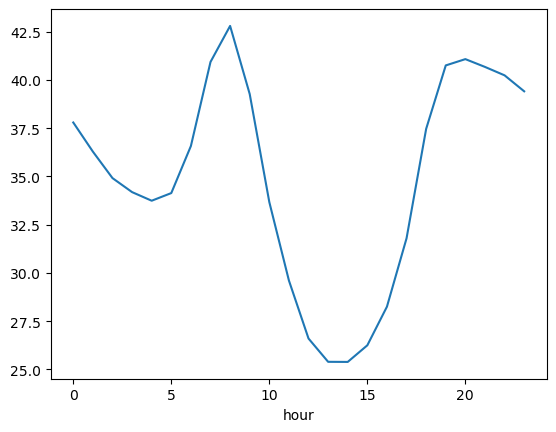

In [22]:
df['NO2'].groupby(df.index.hour).mean().plot(xlabel='hour')

This gives a plot of the diurnal cycle of NO2 concentrations, where you can see the impact of the daytime boundary layer formation and rush hour traffic peaks.

#### <font color='red'>Question 6</font>

Produce a figure with three axes comparing the pollutants PM2.5, NO2 and O3 with the following plots
* A time series of the three pollutants, each in a different colour. The time series should show the monthly concentrations as circles/dots, with the rolling annual mean overlayed
* A comparison of the monthly average seasonal concentrations of each pollutant
* A comparison of the normalised diurnal average concentrations of each pollutant. Normalise by dividing the data by the mean

<Axes: title={'center': 'diurnal cycle'}, xlabel='hour', ylabel='normalised'>

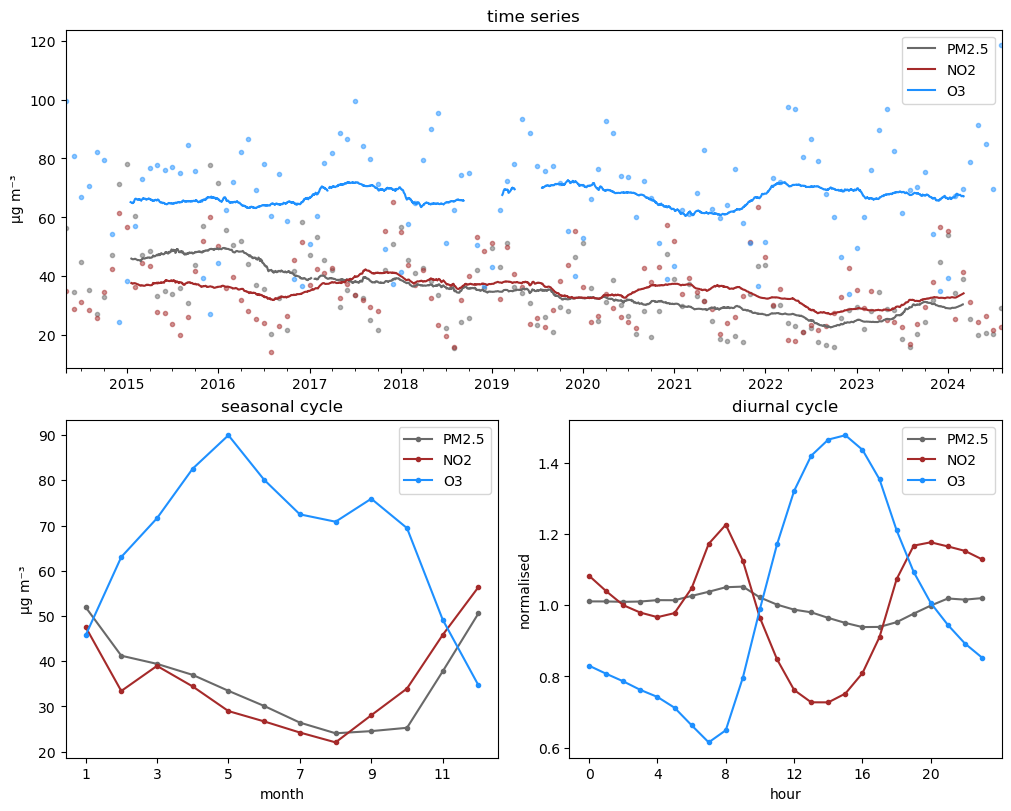

In [23]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained", figsize=[10,8])
gs = GridSpec(2, 2, figure=fig)

# create list of desired pollutants
pols = ['PM2.5', 'NO2', 'O3']
# create colour mapping to ensure consistent
pol_cols = {'PM2.5':'dimgrey', 'NO2':'brown', 'O3':'dodgerblue'}

### time series axis ###
ts_ax = fig.add_subplot(gs[0, :])
df[pols].resample('MS').mean().plot(
    ax=ts_ax, marker='.', ls='', color=pol_cols, legend=None,
    alpha=.5, ylabel='µg m⁻³'
)
df[pols].rolling('365D', center=True, min_periods=330*24).mean().plot(
    color=pol_cols, ax=ts_ax, title='time series',
    xlabel='',
    ylabel='µg m⁻³'
)

### seasonal axis ###
seas_ax = fig.add_subplot(gs[1, 0])
df[pols].groupby(df.index.month).mean().plot(
    ax=seas_ax, color=pol_cols,
    marker='.',
    title='seasonal cycle',
    xticks=range(1,13,2), xlabel='month',
    ylabel='µg m⁻³'
)

### diurnal axis ###
diur_ax = fig.add_subplot(gs[1, 1])
(df/df.mean())[pols].groupby(df.index.hour).mean().plot(
    ax=diur_ax, color=pol_cols,
    marker='.',
    title='diurnal cycle',
    xticks=range(0,24, 4), xlabel='hour',
    ylabel='normalised'
)


### Cross-referencing with metadata

You may be wondering where in China the monitoring station is we are using in this workshop. This information is stored in a seperate file, `metadata.csv`. The cell below loads it into pandas,  making sure the `station_id` column is used for the index

In [24]:
# load in the metadata csv
meta = pd.read_csv('./metadata.csv', index_col='station_id')
print(meta)

           station_name  city       lon       lat         city_en  \
station_id                                                          
1001A              万寿西宫    北京  116.3621  39.87840         Beijing   
1002A           定陵(对照点)    北京  116.2202  40.29150         Beijing   
1003A                东四    北京  116.4174  39.92890         Beijing   
1004A                天坛    北京  116.4072  39.88630         Beijing   
1005A               农展馆    北京  116.4620  39.93650         Beijing   
...                 ...   ...       ...       ...             ...   
3734A              理想之城    东营  118.3500  37.26000        Dongying   
3860A            皇山花园小区    临沂  118.3920  35.03000           Linyi   
3861A           寒亭区实验一小    潍坊  119.2041  36.76990         Weifang   
3866A               三高中    营口  122.2469  40.66302         Yingkou   
3867A           平安区公安北苑  海东地区  102.0738  36.50560  Haidong Region   

                                         station_name_en  province  
station_id                       

The metadata file contains several fields, giving you information about each monitoring station's name, city and latitude and longitude co-ordinates.
The index, named `station_id` can be used to look up the details for each of the monitoring stations. For example, the station used in the plots above has an ID of 1150A. We can use this to print its information below:

In [25]:
print(meta.loc['1150A'])

station_name                    浦东张江
city                              上海
lon                          121.577
lat                          31.2071
city_en                     Shanghai
station_name_en    Pudong Zhangjiang
province                    Shanghai
Name: 1150A, dtype: object


We can select columns from the `meta` dataframe and perform operations on them. For example, to count the number of each province we do:

In [26]:
meta['province'].value_counts()

province
Shandong          150
Guangdong         144
Jiangsu           137
Sichuan           123
Henan             114
Anhui              94
Hebei              84
Liaoning           83
Hunan              82
Shanxi             80
Zhejiang           75
Jiangxi            70
Heilongjiang       67
Hubei              67
Nei Mongol         63
Guangxi            61
Shaanxi            60
Xinjiang Uygur     53
Yunnan             52
Fujian             45
Gansu              43
Guizhou            40
Chongqing          40
Jilin              36
Ningxia Hui        28
Tianjin            27
Beijing            24
Xizang             22
Shanghai           20
Qinghai            16
Hainan             11
Name: count, dtype: int64

#### <font color='red'>Question 7</font>

In pandas, mathematical operations can be performed using entire Series (i.e. a column of a dataframe) at once, often avoiding the need to use loops. This is called 'vectorisation'.

In China, the imaginary [Heihe-Tengchong line](https://en.wikipedia.org/wiki/Heihe%E2%80%93Tengchong_Line) divides the country into its densely populated eastern half and sparsely populated western half. The line stretches from the city of Heihe (latitude: 50.2401, longitude: 127.521) to the city of Tengchong (latitude: 25.0167, longtiude: 98.4833). Approximately 94% of China's population lives on the eastern side of the line.

**Calculate the percentage of monitoring stations on the eastern side of the HT line**

Hints:
* Use the equation of a line, y=mx+c to calculate the longitude of the HT-line for every monitoring station latitude
* Calculate the gradient (slope) of the HT line using the lat-lon co-ordinates given above
* Once you have the gradient, you can calculate the intercept

In [27]:
# Heihe
heihe_x = 127.521
heihe_y = 50.2401

# Tengchong
tengchong_x = 98.4833
tengchong_y = 25.0167 

# calculate the gradient of the HT line
m = (heihe_y - tengchong_y) / (heihe_x - tengchong_x)
# find the intercept
c = tengchong_y - m * tengchong_x

# calculate the lon for each station latitude
HT_line_xs = (meta.lat - c) / m

# create boolean array where True is east of line
east_of_HT = meta.lon > HT_line_xs

print(f'out of the {len(meta)} monitoring stations in the CNEMC network,',
      f'{east_of_HT.sum()/len(meta) * 100:.2f}% are on the eastern side of the Heihe-Tenchong line')


out of the 2016 monitoring stations in the CNEMC network, 81.15% are on the eastern side of the Heihe-Tenchong line
